### Data Ingestion

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
import os

uploaded = files.upload()

os.makedirs('/root/.config/kaggle', exist_ok=True)

for fn in uploaded.keys():
    os.replace(fn, f'/root/.config/kaggle/kaggle.json')


os.chmod('/root/.config/kaggle/kaggle.json', 0o600)


Saving kaggle.json to kaggle.json


In [3]:
import kaggle
kaggle.api.authenticate()

dataset_name = 'sulianova/cardiovascular-disease-dataset'
kaggle.api.dataset_download_files(dataset_name, path='data', unzip=True)

print("Dataset Downloaded and Unzipped")


Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Dataset Downloaded and Unzipped


# Data Processing

In [4]:
import os
import pandas as pd

data_path = "data/cardio_train.csv"
output_dir = "processed_data"
output_data_path = os.path.join(output_dir, 'processed_data.csv')

### EDA

In [5]:
df = pd.read_csv(data_path, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
duplicate_count = df.duplicated().sum()
if duplicate_count != 0:
    df.drop_duplicates(inplace=True)
else:
    print("No Duplicates")

No Duplicates


In [7]:
df['age_years'] = (df['age']/365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [8]:
df.drop(columns=['age'], inplace=True)
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [9]:
df['cholesterol'].value_counts()
df['cholesterol'] = df['cholesterol'].clip(1, 3)

In [10]:
df['gluc'].value_counts()
df['gluc'] = df['gluc'].clip(1, 3)

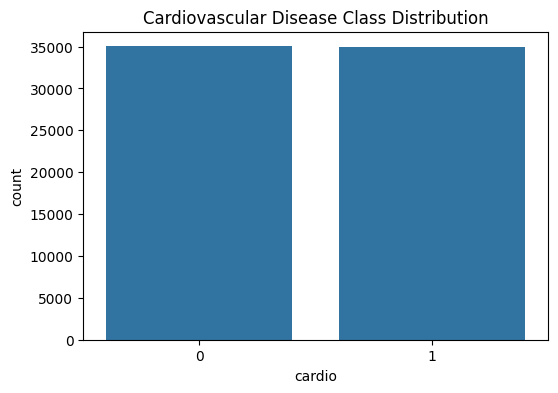

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Class Distribution')
plt.show()


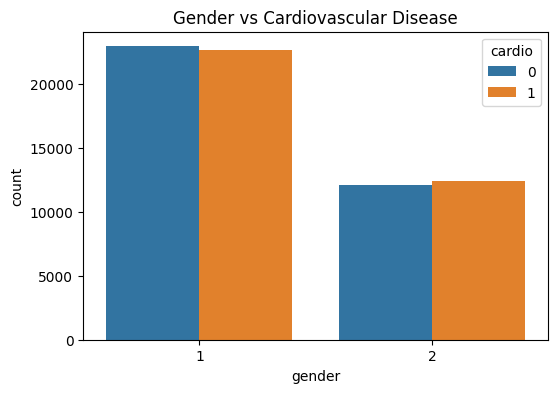

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='cardio', data=df)
plt.title('Gender vs Cardiovascular Disease')
plt.show()


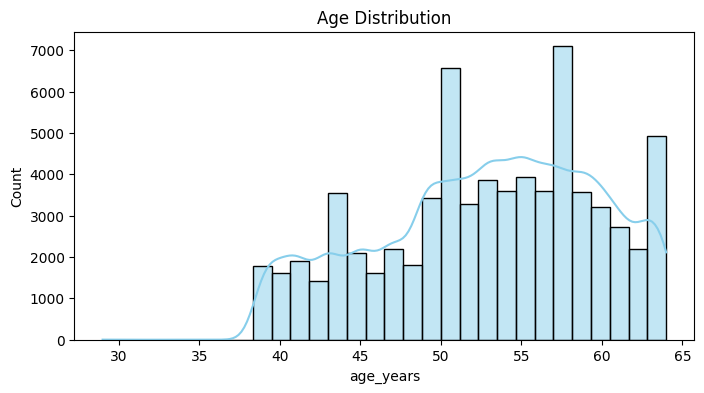

In [13]:

plt.figure(figsize=(8,4))
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()



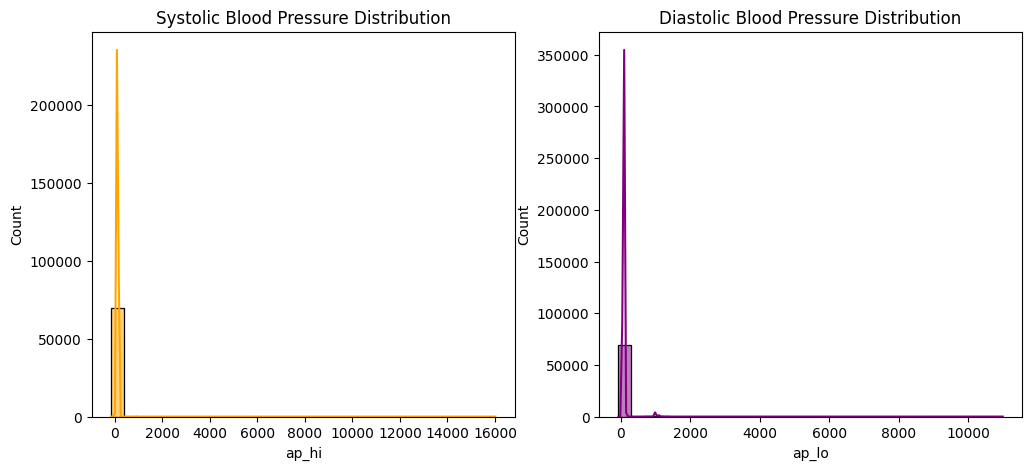

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['ap_hi'], bins=30, kde=True, color='orange')
plt.title('Systolic Blood Pressure Distribution')

plt.subplot(1,2,2)
sns.histplot(df['ap_lo'], bins=30, kde=True, color='purple')
plt.title('Diastolic Blood Pressure Distribution')
plt.show()



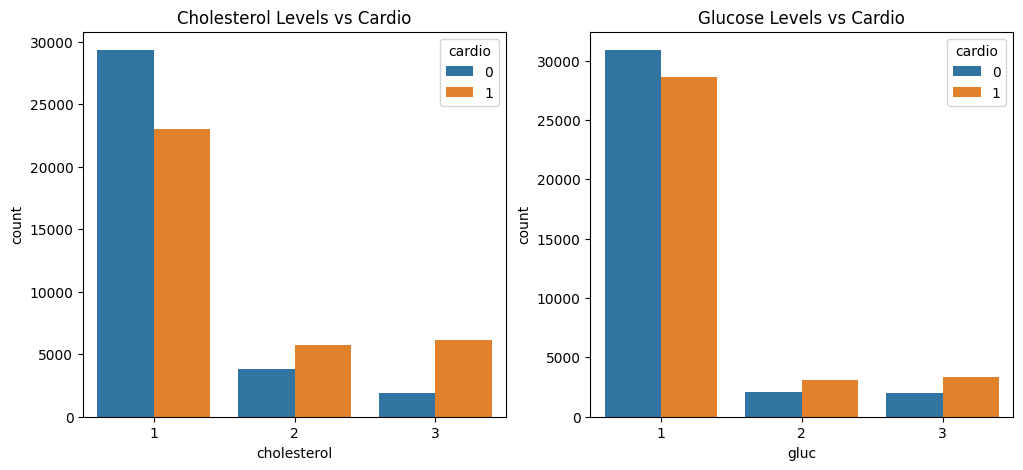

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cholesterol Levels vs Cardio')

plt.subplot(1,2,2)
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title('Glucose Levels vs Cardio')
plt.show()



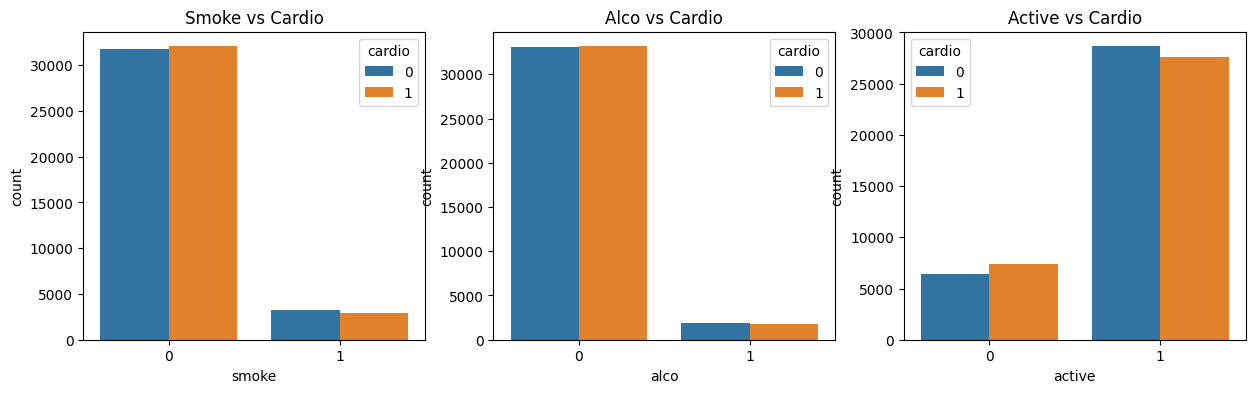

In [17]:
plt.figure(figsize=(15,4))
for i, col in enumerate(['smoke', 'alco', 'active'],1):
    plt.subplot(1,3,i)
    sns.countplot(x=col, hue='cardio', data=df)
    plt.title(f'{col.capitalize()} vs Cardio')
plt.show()



In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**BMI Calculation**

In [18]:
df['height_in_meters'] = df['height']/100

df['bmi'] = df['weight'] / (df['height_in_meters']**2)

df.drop(columns=['height'], inplace=True)

In [19]:
df.head()

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_in_meters,bmi
0,0,2,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120
1,1,1,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679
2,2,1,64.0,130,70,3,1,0,0,0,1,51,1.65,23.507805
3,3,2,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479
4,4,1,56.0,100,60,1,1,0,0,0,0,47,1.56,23.011177


**BMI Category**

In [20]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese (Class I)'
    elif bmi < 40:
        return 'Obese (Class II)'
    else:
        return 'Obese (Class III)'

In [21]:
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [22]:
df.head()

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_in_meters,bmi,bmi_category
0,0,2,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,Normal
1,1,1,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,Obese (Class I)
2,2,1,64.0,130,70,3,1,0,0,0,1,51,1.65,23.507805,Normal
3,3,2,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479,Overweight
4,4,1,56.0,100,60,1,1,0,0,0,0,47,1.56,23.011177,Normal


### Train Test Split

**Assuming df is saved**

In [23]:
data = df.copy()

In [24]:
X = data.drop(columns=['cardio'], axis=1)
y = data['cardio']

In [25]:
X.head(2)

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,height_in_meters,bmi,bmi_category
0,0,2,62.0,110,80,1,1,0,0,1,50,1.68,21.967120,Normal
1,1,1,85.0,140,90,3,1,0,0,1,55,1.56,34.927679,Obese (Class I)


In [26]:
y.head(2)

,cardio
0,0
1,1


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head(2)

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,height_in_meters,bmi,bmi_category
47339,67617,1,80.0,130,90,2,1,0,0,1,59,1.54,33.732501,Obese (Class I)
67456,96320,2,70.0,140,90,1,1,0,0,0,45,1.62,26.672763,Overweight


In [29]:
y_train.head(2)

,cardio
47339,1
67456,1


In [30]:
X_test.head(2)

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,height_in_meters,bmi,bmi_category
46730,66728,1,64.0,140,80,2,1,0,0,1,59,1.56,26.298488,Overweight
48393,69098,1,85.0,160,90,1,1,0,0,1,59,1.70,29.411765,Overweight


In [31]:
y_test.head(2)

,cardio
46730,1
48393,1


### Feature Engineering

In [32]:
num_cols_not_to_scale = ['gender', 'cholesterol', 'gluc', 'smoke', 'active', 'alco']

In [33]:
num_cols_to_scale = ['weight', 'ap_hi', 'ap_lo', 'age_years', 'height_in_meters', 'bmi']

In [34]:
categorical_cols = X_train.select_dtypes(exclude='number').columns

In [35]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
category_order = [
    ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']
]

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_to_scale),
        ('cat', OrdinalEncoder(categories=category_order), categorical_cols)
    ], remainder='passthrough'
)

In [38]:
X_train_preprcoessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [39]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__weight', 'num__ap_hi', 'num__ap_lo', 'num__age_years',
       'num__height_in_meters', 'num__bmi', 'cat__bmi_category',
       'remainder__id', 'remainder__gender', 'remainder__cholesterol',
       'remainder__gluc', 'remainder__smoke', 'remainder__alco',
       'remainder__active'], dtype=object)

In [40]:
X_train_preprcoessed_df = pd.DataFrame(X_train_preprcoessed, columns=feature_names)
X_train_preprcoessed_df.shape

(56000, 14)

In [41]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
X_test_preprocessed_df.columns

Index(['num__weight', 'num__ap_hi', 'num__ap_lo', 'num__age_years',
       'num__height_in_meters', 'num__bmi', 'cat__bmi_category',
       'remainder__id', 'remainder__gender', 'remainder__cholesterol',
       'remainder__gluc', 'remainder__smoke', 'remainder__alco',
       'remainder__active'],
      dtype='object')

### Models

**XGBoost Classifier**

In [42]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_preprcoessed_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
xgb_y_pred = xgb_model.predict(X_test_preprocessed_df)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print(f"Accuracy of XGBoost Classifier is {xgb_acc}")
print(f"Precision of XGBoost Classifier is {xgb_precision}")
print(f"Recall of XGBoost Classifier is {xgb_recall}")
print(f"F1 Score of XGBoost Classifier is {xgb_f1}")
print(f"Classification Report of XGBoost Classifier \n{xgb_report}")

Accuracy of XGBoost Classifier is 0.7352857142857143
Precision of XGBoost Classifier is 0.7532945142506895
Recall of XGBoost Classifier is 0.7010838562464347
F1 Score of XGBoost Classifier is 0.7262520313192495
Classification Report of XGBoost Classifier 
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000



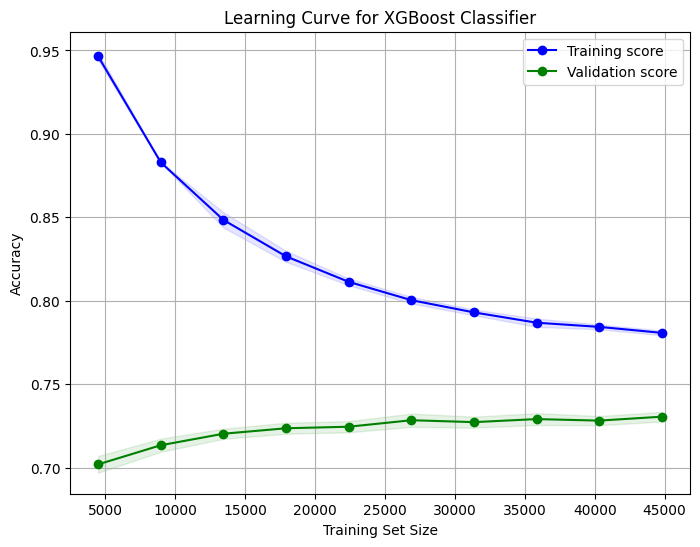

In [45]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

    plt.title('Learning Curve for XGBoost Classifier')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(xgb_model, X_train_preprcoessed_df, y_train, cv=5, scoring='accuracy')


In [46]:
allresults = []
xgb_results = {
    'Model Name': "XGBoost Classifier",
    'Accuracy': xgb_acc,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1
}

allresults.append(xgb_results)
print(xgb_results)

{'Model Name': 'XGBoost Classifier', 'Accuracy': 0.7352857142857143, 'Precision': 0.7532945142506895, 'Recall': 0.7010838562464347, 'F1 Score': 0.7262520313192495}


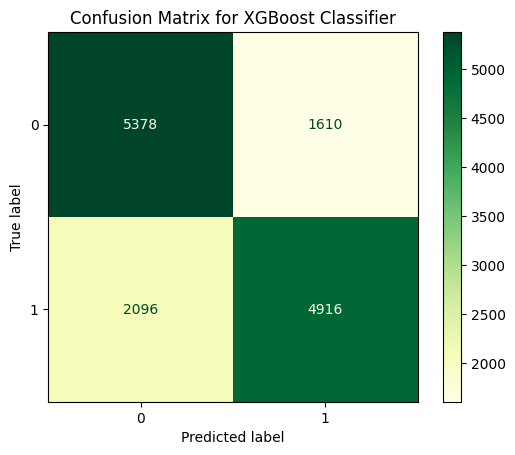

In [47]:
cm_xgb = confusion_matrix(y_test, xgb_y_pred, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='YlGn')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [49]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_preprcoessed_df, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [50]:
rf_y_pred = rf_model.predict(X_test_preprocessed_df)


In [51]:
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


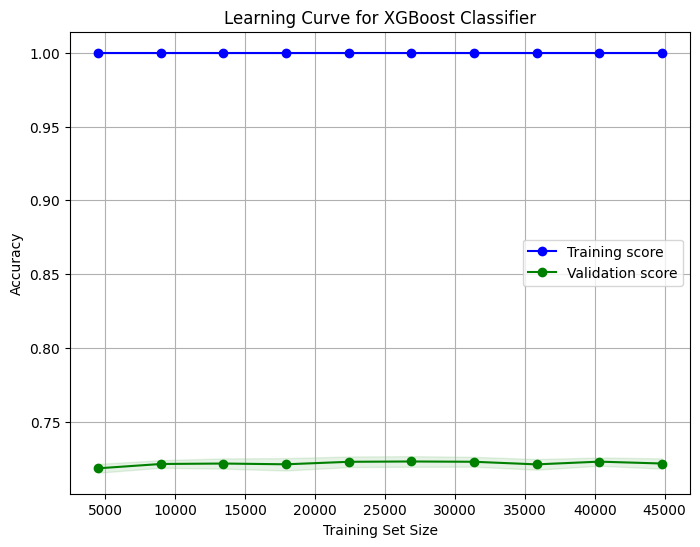

In [52]:
plot_learning_curve(
    rf_model,
    X_train_preprcoessed_df,
    y_train,
    cv=5,
    scoring='accuracy'
)


In [53]:
rf_results = {
    'Model Name': "Random Forest Classifier",
    'Accuracy': rf_acc,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1
}

allresults.append(rf_results)
print(rf_results)


{'Model Name': 'Random Forest Classifier', 'Accuracy': 0.7226428571428571, 'Precision': 0.7229705235160339, 'Recall': 0.7226428571428571, 'F1 Score': 0.7225552989855109}


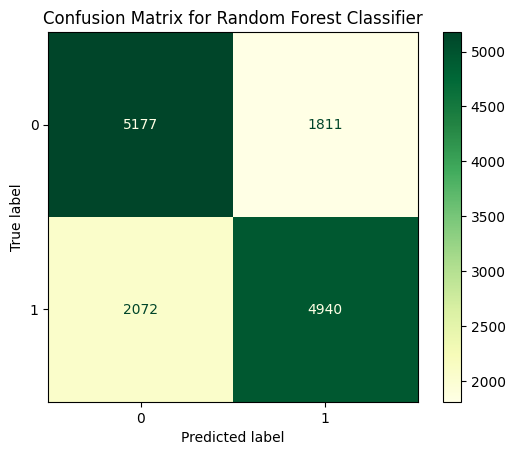

In [54]:
cm_rf = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='YlGn')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


# Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC
svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_preprcoessed_df, y_train)


SVC(probability=True, random_state=42)

In [56]:
svm_y_pred = svm_model.predict(X_test_preprocessed_df)


In [57]:
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')


In [59]:
svm_results = {
    'Model Name': "Support Vector Machine",
    'Accuracy': svm_acc,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1 Score': svm_f1
}

allresults.append(svm_results)
print(svm_results)


{'Model Name': 'Support Vector Machine', 'Accuracy': 0.49514285714285716, 'Precision': 0.49515931538309604, 'Recall': 0.49514285714285716, 'F1 Score': 0.492076022336631}


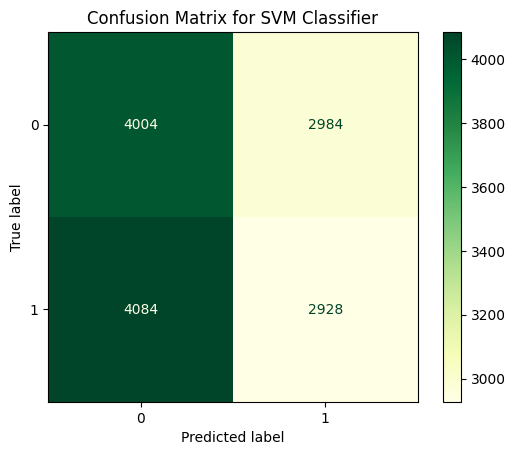

In [60]:
cm_svm = confusion_matrix(y_test, svm_y_pred, labels=svm_model.classes_)
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='YlGn')
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


# Fine-tuned XGB

In [64]:
from sklearn.model_selection import GridSearchCV

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}
grid_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train_preprcoessed_df, y_train)
print("Best Parameters:", grid_xgb.best_params_)
xgb_tuned = grid_xgb.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:39:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [65]:
xgb_tuned_y_pred = xgb_tuned.predict(X_test_preprocessed_df)


In [66]:
xgb_tuned_acc = accuracy_score(y_test, xgb_tuned_y_pred)
xgb_tuned_precision = precision_score(y_test, xgb_tuned_y_pred, average='weighted')
xgb_tuned_recall = recall_score(y_test, xgb_tuned_y_pred, average='weighted')
xgb_tuned_f1 = f1_score(y_test, xgb_tuned_y_pred, average='weighted')


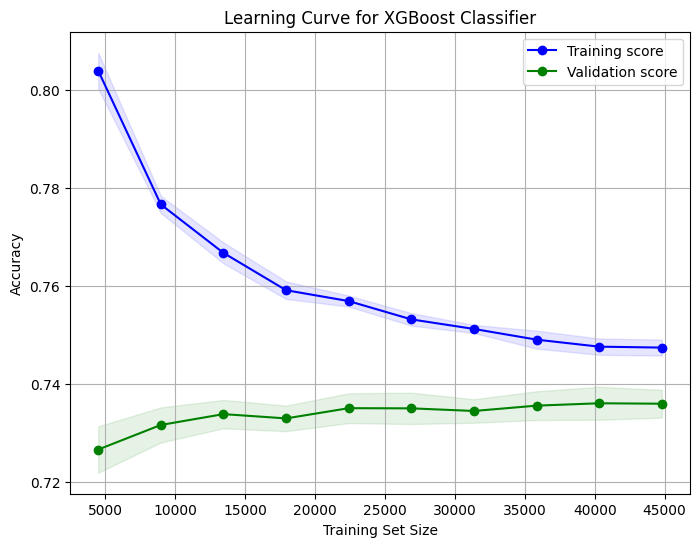

In [71]:
plot_learning_curve(
    xgb_tuned,
    X_train_preprcoessed_df,
    y_train,
    cv=5,
    scoring='accuracy'
)


In [68]:
xgb_tuned_results = {
    'Model Name': "Fine-Tuned XGBoost Classifier",
    'Accuracy': xgb_tuned_acc,
    'Precision': xgb_tuned_precision,
    'Recall': xgb_tuned_recall,
    'F1 Score': xgb_tuned_f1
}

allresults.append(xgb_tuned_results)
print(xgb_tuned_results)


{'Model Name': 'Fine-Tuned XGBoost Classifier', 'Accuracy': 0.7392142857142857, 'Precision': 0.74077392523616, 'Recall': 0.7392142857142857, 'F1 Score': 0.738818700484412}


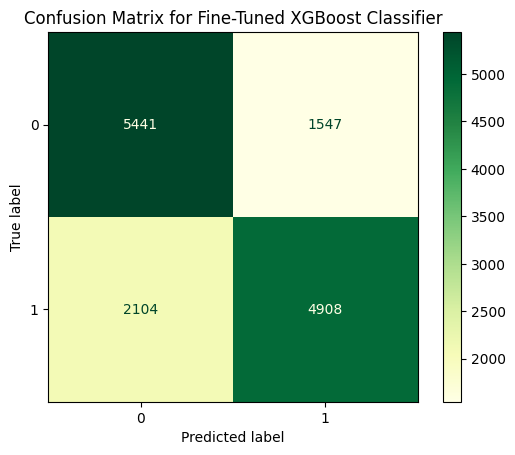

In [69]:
cm_xgb_tuned = confusion_matrix(y_test, xgb_tuned_y_pred, labels=xgb_tuned.classes_)
disp_xgb_tuned = ConfusionMatrixDisplay(
    cm_xgb_tuned,
    display_labels=xgb_tuned.classes_
)

disp_xgb_tuned.plot(cmap='YlGn')
plt.title("Confusion Matrix for Fine-Tuned XGBoost Classifier")
plt.show()


In [70]:
import pandas as pd

results_df = pd.DataFrame(allresults)
results_df


,Model Name,Accuracy,Precision,Recall,F1 Score
0,XGBoost Classifier,0.735286,0.753295,0.701084,0.726252
1,Random Forest Classifier,0.722643,0.722971,0.722643,0.722555
2,Support Vector Machine,0.495143,0.495159,0.495143,0.492076
3,Fine-Tuned XGBoost Classifier,0.739214,0.740774,0.739214,0.738819


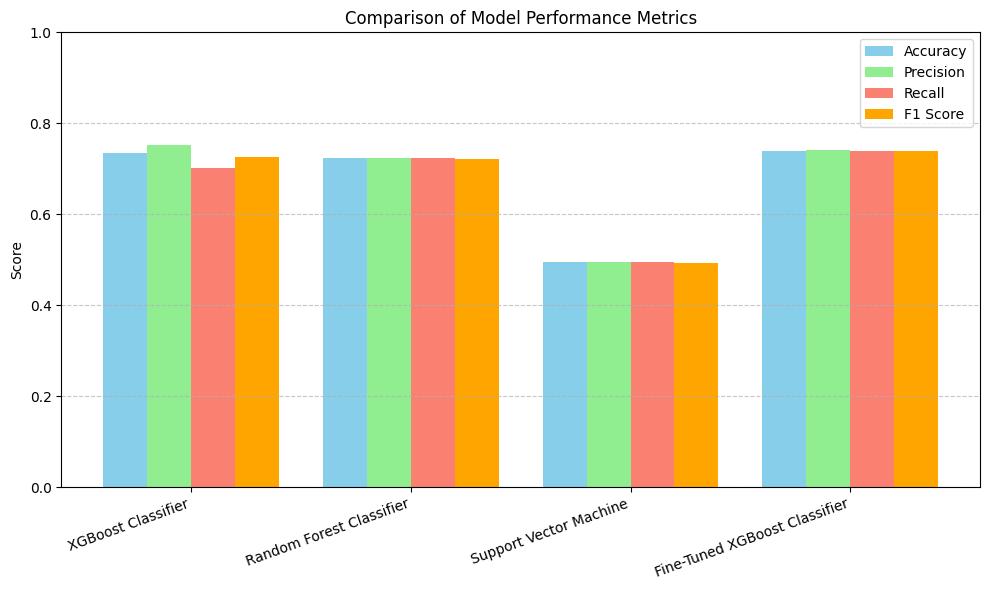

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = {
    'Model Name': [
        'XGBoost Classifier',
        'Random Forest Classifier',
        'Support Vector Machine',
        'Fine-Tuned XGBoost Classifier'
    ],
    'Accuracy': [0.735286, 0.722643, 0.495143, 0.739214],
    'Precision': [0.753295, 0.722971, 0.495159, 0.740774],
    'Recall': [0.701084, 0.722643, 0.495143, 0.739214],
    'F1 Score': [0.726252, 0.722555, 0.492076, 0.738819]
}

df = pd.DataFrame(data)


bar_width = 0.2
x = np.arange(len(df['Model Name']))


plt.figure(figsize=(10,6))


plt.bar(x - 1.5*bar_width, df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*bar_width, df['Precision'], width=bar_width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*bar_width, df['Recall'], width=bar_width, label='Recall', color='salmon')
plt.bar(x + 1.5*bar_width, df['F1 Score'], width=bar_width, label='F1 Score', color='orange')


plt.xticks(x, df['Model Name'], rotation=20, ha='right')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
